In [1]:
import pandas as pd
import numpy as np
CCTV_Seoul = pd.read_excel('../data/01.seoul_cctv.xlsx', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [2]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [3]:
CCTV_Seoul.columns[0]

'기관명'

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
Pop_Seoul = pd.read_excel('../data/01.pop_seoul.xlsx', encoding='utf-8')
Pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035


In [6]:
Pop_Seoul = pd.read_excel('../data/01.pop_seoul.xlsx', header = 2, usecols = 'B, D, G, J, N', encoding='utf-8')
Pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9985652,9720846,264806,1534957
1,종로구,160520,150383,10137,28203
2,중구,136030,126092,9938,24035
3,용산구,245362,229431,15931,39650
4,성동구,304851,297397,7454,45005


In [7]:
Pop_Seoul.rename(columns={Pop_Seoul.columns[0] : '구별',
                          Pop_Seoul.columns[1] : '인구수',
                          Pop_Seoul.columns[2] : '한국인',
                          Pop_Seoul.columns[3] : '외국인',
                          Pop_Seoul.columns[4] : '고령자'}, inplace=True)
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9985652,9720846,264806,1534957
1,종로구,160520,150383,10137,28203
2,중구,136030,126092,9938,24035
3,용산구,245362,229431,15931,39650
4,성동구,304851,297397,7454,45005


In [8]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


In [9]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [10]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2015년'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False). head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,1304.687500
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194,812.844037
18,양천구,2775,772.0,161.0,185.0,169,172,349,137,830,765.116279
11,동작구,1780,238.0,93.0,29.0,503,130,254,278,255,605.384615
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,591.666667


In [11]:
Pop_Seoul.drop([0], inplace=True)
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,160520,150383,10137,28203
2,중구,136030,126092,9938,24035
3,용산구,245362,229431,15931,39650
4,성동구,304851,297397,7454,45005
5,광진구,363925,349574,14351,49457


In [12]:
Pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [13]:
Pop_Seoul[Pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [14]:
Pop_Seoul['외국인비율'] = Pop_Seoul['외국인'] / Pop_Seoul['인구수'] * 100
Pop_Seoul['고령자비율'] = Pop_Seoul['고령자'] / Pop_Seoul['인구수'] * 100
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,160520,150383,10137,28203,6.315101,17.569773
2,중구,136030,126092,9938,24035,7.305741,17.668897
3,용산구,245362,229431,15931,39650,6.492855,16.159797
4,성동구,304851,297397,7454,45005,2.445129,14.762950
5,광진구,363925,349574,14351,49457,3.943395,13.589888


In [15]:
Pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,678067,671512,6555,90700,0.966719,13.376259
16,강서구,593203,586936,6267,87032,1.056468,14.671537
23,강남구,546158,541233,4925,73097,0.901754,13.383856
11,노원구,533041,528887,4154,83636,0.779302,15.690350
21,관악구,516318,499740,16578,77341,3.210812,14.979334


In [16]:
Pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405154,373349,31805,60071,7.850101,14.826708
17,구로구,436707,405075,31632,68280,7.243300,15.635197
18,금천구,250554,232250,18304,38950,7.305411,15.545551
21,관악구,516318,499740,16578,77341,3.210812,14.979334
3,용산구,245362,229431,15931,39650,6.492855,16.159797


In [17]:
Pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,678067,671512,6555,90700,0.966719,13.376259
16,강서구,593203,586936,6267,87032,1.056468,14.671537
11,노원구,533041,528887,4154,83636,0.779302,15.690350
12,은평구,483938,479524,4414,83272,0.912100,17.207163
21,관악구,516318,499740,16578,77341,3.210812,14.979334


In [18]:
Pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405154,373349,31805,60071,7.850101,14.826708
2,중구,136030,126092,9938,24035,7.305741,17.668897
18,금천구,250554,232250,18304,38950,7.305411,15.545551
17,구로구,436707,405075,31632,68280,7.243300,15.635197
3,용산구,245362,229431,15931,39650,6.492855,16.159797


In [19]:
Pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,315395,311773,3622,62338,1.148401,19.765057
10,도봉구,331744,329560,2184,60784,0.658339,18.322562
2,중구,136030,126092,9938,24035,7.305741,17.668897
1,종로구,160520,150383,10137,28203,6.315101,17.569773
12,은평구,483938,479524,4414,83272,0.912100,17.207163


In [20]:
data_result = pd.merge(CCTV_Seoul, Pop_Seoul, on='구별')
data_result

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,327.838828,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,591.666667,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,395.862069,315395,311773,3622,62338,1.148401,19.765057
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,378.609626,593203,586936,6267,87032,1.056468,14.671537
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,325.779967,516318,499740,16578,77341,3.210812,14.979334
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,1304.687500,363925,349574,14351,49457,3.943395,13.589888
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,504.477612,436707,405075,31632,68280,7.243300,15.635197
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,226.439791,250554,232250,18304,38950,7.305411,15.545551
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,122.342733,533041,528887,4154,83636,0.779302,15.690350
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,581.355932,331744,329560,2184,60784,0.658339,18.322562


In [21]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,327.838828,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,591.666667,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,395.862069,315395,311773,3622,62338,1.148401,19.765057
3,강서구,1617,378.609626,593203,586936,6267,87032,1.056468,14.671537
4,관악구,3985,325.779967,516318,499740,16578,77341,3.210812,14.979334


In [22]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,327.838828,546158,541233,4925,73097,0.901754,13.383856
강동구,1879,591.666667,461547,457164,4383,67742,0.949632,14.677162
강북구,1265,395.862069,315395,311773,3622,62338,1.148401,19.765057
강서구,1617,378.609626,593203,586936,6267,87032,1.056468,14.671537
관악구,3985,325.779967,516318,499740,16578,77341,3.210812,14.979334


In [23]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44976663],
       [-0.44976663,  1.        ]])

In [24]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05977236],
       [-0.05977236,  1.        ]])

In [25]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38014758],
       [0.38014758, 1.        ]])

In [26]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,327.838828,546158,541233,4925,73097,0.901754,13.383856
관악구,3985,325.779967,516318,499740,16578,77341,3.210812,14.979334
구로구,3227,504.477612,436707,405075,31632,68280,7.243300,15.635197
성북구,3003,471.684588,452290,441812,10478,72822,2.316655,16.100732
은평구,2962,495.555556,483938,479524,4414,83272,0.912100,17.207163


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System')

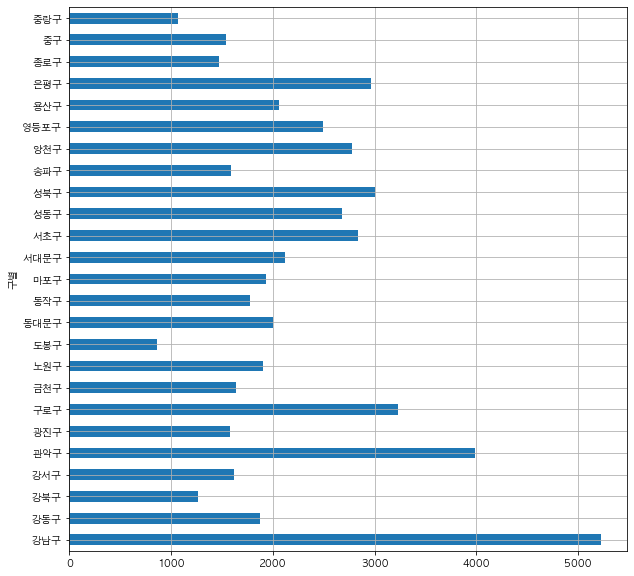

In [29]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

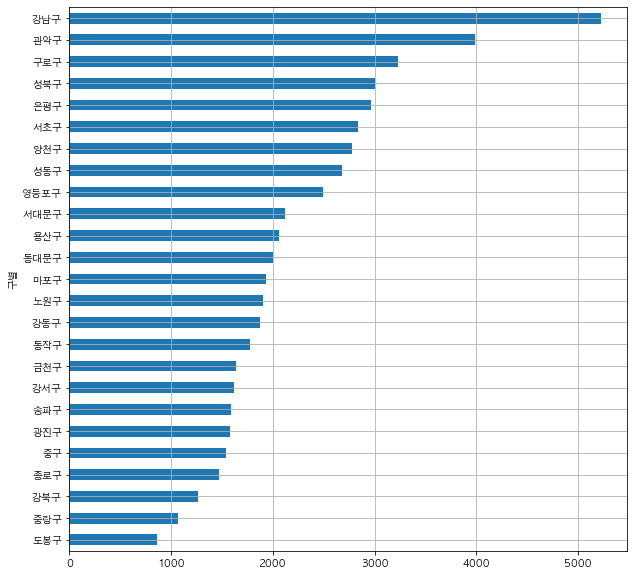

In [30]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

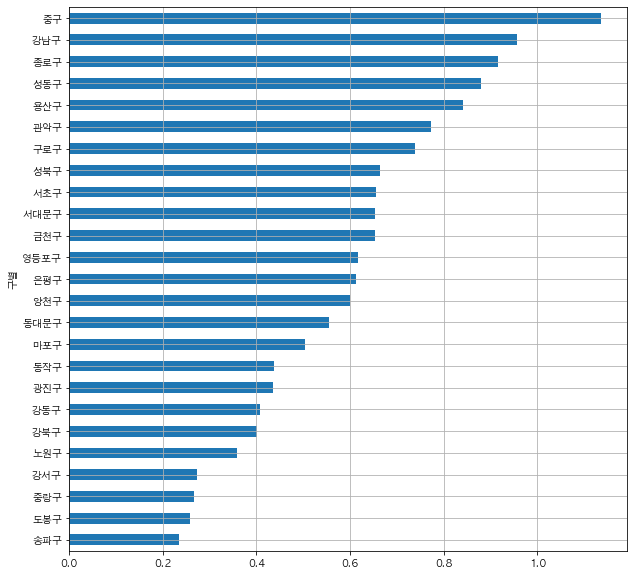

In [31]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

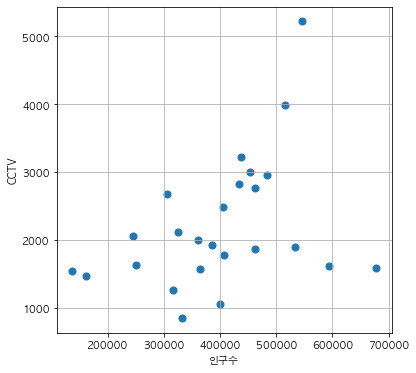

In [32]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

인구수에 따른 cctv수

In [33]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88508881e-03, 1.06734028e+03])

In [34]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

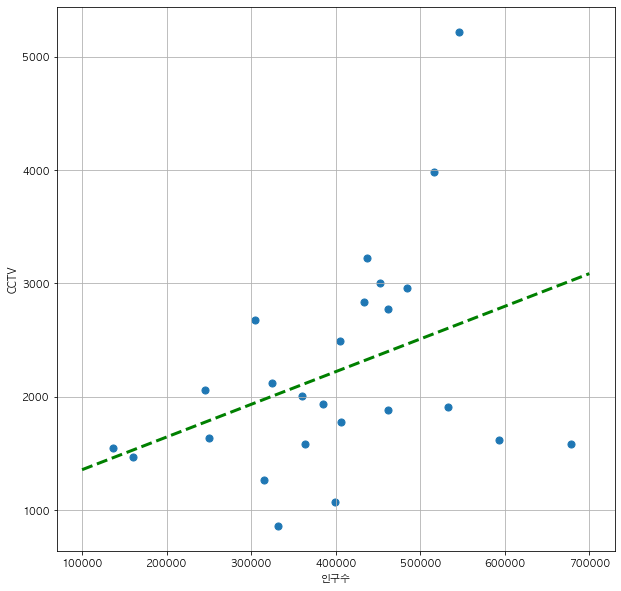

In [37]:
plt.figure(figsize = (10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [39]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(10000, 70000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,327.838828,546158,541233,4925,73097,0.901754,13.383856,0.955950,2577.945379
송파구,1586,368.674699,678067,671512,6555,90700,0.966719,13.376259,0.233900,1437.623801
관악구,3985,325.779967,516318,499740,16578,77341,3.210812,14.979334,0.771811,1428.036429
도봉구,858,581.355932,331744,329560,2184,60784,0.658339,18.322562,0.258633,1166.451188
강서구,1617,378.609626,593203,586936,6267,87032,1.056468,14.671537,0.272588,1161.783624
중랑구,1068,192.156863,399415,394414,5001,67637,1.252081,16.934016,0.267391,1151.688033
구로구,3227,504.477612,436707,405075,31632,68280,7.243300,15.635197,0.738939,899.721235
성동구,2679,553.488372,304851,297397,7454,45005,2.445129,14.762950,0.878790,732.137505
강북구,1265,395.862069,315395,311773,3622,62338,1.148401,19.765057,0.401084,712.282871


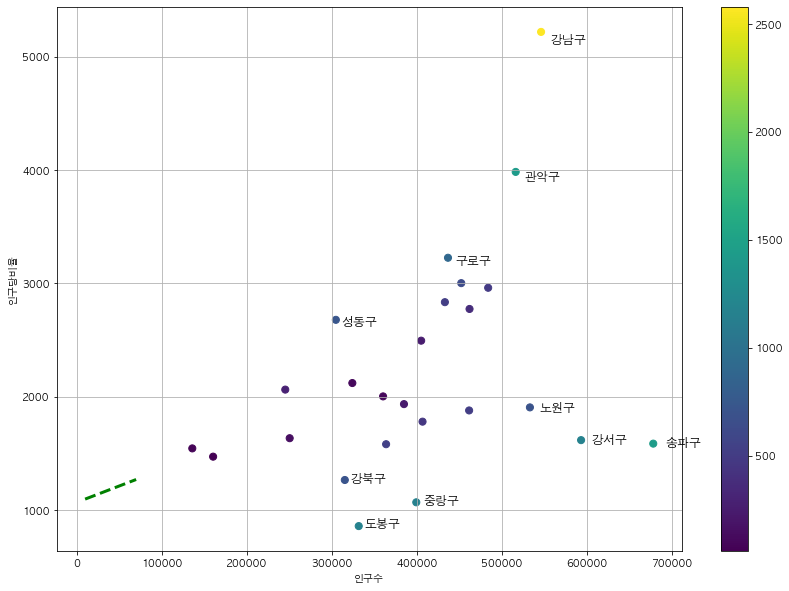

In [41]:
plt.figure(figsize = (14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize = 12)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

In [49]:
df_sort.to_excel('../data/01.result_data.xlsx', index=True)